# Project Part A: Exploratory Data Analysis

![](banner_project.jpg)

In [1]:
analyst = "Micah Feras"

In [2]:
f = "setup.R"; for (i in 1:10) { if (file.exists(f)) break else f = paste0("../", f) }; source(f)
options(repr.matrix.max.rows=674)
update_geom_defaults("point", list(size=1))
update_geom_defaults("col", list(fill=PALETTE[1]))

Loading required package: psych

Loading required package: lubridate


Attaching package: 'lubridate'


The following objects are masked from 'package:base':

    date, intersect, setdiff, union


Loading required package: reshape2

Loading required package: ggplot2


Attaching package: 'ggplot2'


The following objects are masked from 'package:psych':

    %+%, alpha


Loading required package: gridExtra

Loading required package: GGally

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Loading required package: rgl

Loading required package: plyr

Loading required package: dplyr


Attaching package: 'dplyr'


The following objects are masked from 'package:plyr':

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


The following object is masked from 'package:gridExtra':

    combine


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    inters

### Objective

Conduct an exploratory data analysis of public company fundamentals.  Later, use the insights gleaned along with additional analysis to recommend a portfolio of 12 company investments that maximizes 12-month return of an overall \$1,000,000 investment.

### Approach

Retrieve a public company fundamentals dataset comprising thousands of US companies from quarters 1, 2, 3, and 4 of year 2017 + company stock price data for those companies from quarter 4 of year 2018.

Prepare the data so that each company and its associated information is represented as a single observation.

Apply various descriptive statistics and data visualizations to look for interesting patterns and inter-company relationships.

### Data Source

Data files:

* Data Dictionary.csv
* Company Fundamentals 2017.csv
* Company Fundamentals 2018.csv

The datasets and accompanying data dictionary are sourced from ...

* Wharton Research Data Services > Compustat - Capital IQ from Standard & Poor's > North America - Daily > Fundamentals Quarterly (https://wrds-www.wharton.upenn.edu/)

  * Date Variable: Data Date
  * Date Range: 2017-01 to 2017-12 -or- 2018-01 to 2018-12
  * Company Codes: Search the entire database
    * Consolidtaion Level: C, Output
    * Industry Format: INDL, FS, Output
    * Data Format: STD, Output
    * Population Source: D, Output
    * Quarter Type: Fiscal View, Output
    * Currency: USD, Output (not CAD)
    * Company Status: Active, Output (not Inactive)
  * Variable Types: Data Items, Select All (674)
  * Query output:
    * Output format: comma-delimited text
    * Compression type: None
    * Data format: MMDDYY10

The datasets are restricted to select US active, publicly held companies that reported quarterly measures including stock prices for 1st, 2nd, 3rd, and 4th quarters in years 2017 and 2018.  All non-missing stock prices exceed $3 per share.  File formats are all comma-separated values (CSV).

The data dictionary is from Variable Descriptions tab, copied to Excel, saved in csv format.

_**For this project, do not source any additional data from year 2019.**_

## Data

### Data Dictionary

In [3]:
# Retrieve the data dictionary.
# How many variable entries in the company fundamentals datasets?
# What are the variable names, types, and descriptions?

dictionary = read.csv("Data Dictionary.csv", header=TRUE, na.strings=c("NA", ""), stringsAsFactors=FALSE)
size(dictionary)
fmt(dictionary)

observations,variables
<int>,<int>
674,4


Variable.Name,Data.Type,Variable.Description,Help
ACCHGQ,NUM,ACCHGQ -- Accounting Changes - Cumulative Effect,NA
ACCHGY,NUM,ACCHGY -- Accounting Changes - Cumulative Effect,NA
ACCTCHGQ,CHAR,ACCTCHGQ -- Adoption of Accounting Changes,NA
ACCTSTDQ,CHAR,ACCTSTDQ -- Accounting Standard,NA
ACOMINCQ,NUM,ACOMINCQ -- Accumulated Other Comprehensive Income (Loss),NA
ACOQ,NUM,ACOQ -- Current Assets - Other - Total,NA
ACTQ,NUM,ACTQ -- Current Assets - Total,NA
ADD1,CHAR,ADD1 -- Address Line 1,NA
ADD2,CHAR,ADD2 -- Address Line 2,NA
ADD3,CHAR,ADD3 -- Address Line 3,NA


### Data for Current Year

#### Retrieve Raw Data

In [4]:
# Retrieve the 2017 data.
# How many observations and variables?
# Present the first few observations.

datax = read.csv("Company Fundamentals 2017.csv", header=TRUE, na.strings=c("NA", ""), stringsAsFactors=FALSE)

size(datax)
fmt(datax[1:3,], FFO, "left")

observations,variables
<int>,<int>
33269,680


datax (first few observations) 
 
 
 gvkey 
 datadate 
 fyearq 
 fqtr 
 fyr 
 indfmt 
 consol 
 popsrc 
 datafmt 
 tic 
 cusip 
 conm 
 acctchgq 
 acctstdq 
 adrrq 
 ajexq 
 ajpq 
 bsprq 
 compstq 
 curcdq 
 curncdq 
 currtrq 
 curuscnq 
 datacqtr 
 datafqtr 
 finalq 
 ogmq 
 rp 
 scfq 
 srcq 
 staltq 
 updq 
 apdedateq 
 fdateq 
 pdateq 
 rdq 
 acchgq 
 acomincq 
 acoq 
 actq 
 altoq 
 ancq 
 anoq 
 aociderglq 
 aociotherq 
 aocipenq 
 aocisecglq 
 aol2q 
 aoq 
 apq 
 aqaq 
 aqdq 
 aqepsq 
 aqpl1q 
 aqpq 
 arcedq 
 arceepsq 
 arceq 
 atq 
 aul3q 
 billexceq 
 capr1q 
 capr2q 
 capr3q 
 capsftq 
 capsq 
 ceiexbillq 
 ceqq 
 cheq 
 chq 
 cibegniq 
 cicurrq 
 ciderglq 
 cimiiq 
 ciotherq 
 cipenq 
 ciq 
 cisecglq 
 citotalq 
 cogsq 
 csh12q 
 cshfd12 
 cshfdq 
 cshiq 
 cshopq 
 cshoq 
 cshprq 
 cstkcvq 
 cstkeq 
 cstkq 
 dcomq 
 dd1q 
 deracq 
 deraltq 
 derhedglq 
 derlcq 
 derlltq 
 diladq 
 dilavq 
 dlcq 
 dlttq 
 doq 
 dpacreq 
 dpactq 
 dpq 
 dpretq 
 drcq 
 drltq 
 dteaq 
 dtedq 
 dteepsq 
 dtepq 
 dvintfq 
 dvpq 
 epsf12 
 epsfi12 
 epsfiq 
 epsfxq 
 epspi12 
 epspiq 
 epspxq 
 epsx12 
 esopctq 
 esopnrq 
 esoprq 
 esoptq 
 esubq 
 fcaq 
 ffoq 
 finacoq 
 finaoq 
 finchq 
 findlcq 
 findltq 
 finivstq 
 finlcoq 
 finltoq 
 finnpq 
 finreccq 
 finrecltq 
 finrevq 
 finxintq 
 finxoprq 
 gdwlamq 
 gdwlia12 
 gdwliaq 
 gdwlid12 
 gdwlidq 
 gdwlieps12 
 gdwliepsq 
 gdwlipq 
 gdwlq 
 glaq 
 glcea12 
 glceaq 
 glced12 
 glcedq 
 glceeps12 
 glceepsq 
 glcepq 
 gldq 
 glepsq 
 glivq 
 glpq 
 hedgeglq 
 ibadj12 
 ibadjq 
 ibcomq 
 ibmiiq 
 ibq 
 icaptq 
 intaccq 
 intanoq 
 intanq 
 invfgq 
 invoq 
 invrmq 
 invtq 
 invwipq 
 ivaeqq 
 ivaoq 
 ivltq 
 ivstq 
 lcoq 
 lctq 
 lltq 
 lnoq 
 lol2q 
 loq 
 loxdrq 
 lqpl1q 
 lseq 
 ltmibq 
 ltq 
 lul3q 
 mibnq 
 mibq 
 mibtq 
 miiq 
 msaq 
 ncoq 
 niitq 
 nimq 
 niq 
 nopiq 
 npatq 
 npq 
 nrtxtdq 
 nrtxtepsq 
 nrtxtq 
 obkq 
 oepf12 
 oeps12 
 oepsxq 
 oiadpq 
 oibdpq 
 opepsq 
 optdrq 
 optfvgrq 
 optlifeq 
 optrfrq 
 optvolq 
 piq 
 pllq 
 pnc12 
 pncd12 
 pncdq 
 pnceps12 
 pncepsq 
 pnciapq 
 pnciaq 
 pncidpq 
 pncidq 
 pnciepspq 
 pnciepsq 
 pncippq 
 pncipq 
 pncpd12 
 pncpdq 
 pncpeps12 
 pncpepsq 
 pncpq 
 pncq 
 pncwiapq 
 pncwiaq 
 pncwidpq 
 pncwidq 
 pncwiepq 
 pncwiepsq 
 pncwippq 
 pncwipq 
 pnrshoq 
 ppegtq 
 ppentq 
 prcaq 
 prcd12 
 prcdq 
 prce12 
 prceps12 
 prcepsq 
 prcpd12 
 prcpdq 
 prcpeps12 
 prcpepsq 
 prcpq 
 prcraq 
 prshoq 
 pstknq 
 pstkq 
 pstkrq 
 rcaq 
 rcdq 
 rcepsq 
 rcpq 
 rdipaq 
 rdipdq 
 rdipepsq 
 rdipq 
 recdq 
 rectaq 
 rectoq 
 rectq 
 rectrq 
 recubq 
 req 
 retq 
 reunaq 
 revtq 
 rllq 
 rra12 
 rraq 
 rrd12 
 rrdq 
 rreps12 
 rrepsq 
 rrpq 
 rstcheltq 
 rstcheq 
 saleq 
 seqoq 
 seqq 
 seta12 
 setaq 
 setd12 
 setdq 
 seteps12 
 setepsq 
 setpq 
 spce12 
 spced12 
 spcedpq 
 spcedq 
 spceeps12 
 spceepsp12 
 spceepspq 
 spceepsq 
 spcep12 
 spcepd12 
 spcepq 
 spceq 
 spidq 
 spiepsq 
 spioaq 
 spiopq 
 spiq 
 sretq 
 stkcoq 
 stkcpaq 
 teqq 
 tfvaq 
 tfvceq 
 tfvlq 
 tieq 
 tiiq 
 tstknq 
 tstkq 
 txdbaq 
 txdbcaq 
 txdbclq 
 txdbq 
 txdiq 
 txditcq 
 txpq 
 txtq 
 txwq 
 uacoq 
 uaoq 
 uaptq 
 ucapsq 
 ucconsq 
 uceqq 
 uddq 
 udmbq 
 udoltq 
 udpcoq 
 udvpq 
 ugiq 
 uinvq 
 ulcoq 
 uniamiq 
 unopincq 
 uopiq 
 updvpq 
 upmcstkq 
 upmpfq 
 upmpfsq 
 upmsubpq 
 upstkcq 
 upstkq 
 urectq 
 uspiq 
 usubdvpq 
 usubpcvq 
 utemq 
 wcapq 
 wdaq 
 wddq 
 wdepsq 
 wdpq 
 xaccq 
 xidoq 
 xintq 
 xiq 
 xoprq 
 xopt12 
 xoptd12 
 xoptd12p 
 xoptdq 
 xoptdqp 
 xopteps12 
 xoptepsp12 
 xoptepsq 
 xoptepsqp 
 xoptq 
 xoptqp 
 xrdq 
 xsgaq 
 acchgy 
 afudccy 
 afudciy 
 amcy 
 aolochy 
 apalchy 
 aqay 
 aqcy 
 aqdy 
 aqepsy 
 aqpy 
 arcedy 
 arceepsy 
 arcey 
 capxy 
 cdvcy 
 chechy 
 cibegniy 
 cicurry 
 cidergly 
 cimiiy 
 ciothery 
 cipeny 
 cisecgly 
 citotaly 
 ciy 
 cogsy 
 cshfdy 
 cshpry 
 cstkey 
 depcy 
 derhedgly 
 dilady 
 dilavy 
 dlcchy 
 dltisy 
 dltry 
 doy 
 dpcy 
 dprety 
 dpy 
 dteay 
 dtedy 
 dteepsy 
 dtepy 
 dvpy 
 dvy 
 epsfiy 
 ep

In [5]:
fmt(length(unique(datax$conm)), title="unique companies in the dataset")


unique companies in the dataset
8496


#### Partition Data by Calendar Quarter 

To partition the dataset by calendar quarter in which information is reported, first add a synthetic variable to indicate such.  Then partition into four new datasets, one for each quarter, and drop the quarter variables. Additionally, filter the observations to include only those with non-missing `prccq` $\geq$ 3.  Then remove any observations about companies that reported more than once per quarter.  Then change all the variable names (except for the `gvkey`, `tic`, and `conm` variables) by suffixing them with quarter information - e.g., in the Quarter 1 dataset, `prccq` becomes `prccq.q1`, etc.

In [6]:
# Partition the dataset as described.
# How many observations and variables in each quarter dataset?

datax$quarter = quarter(mdy(datax[,2]))

data.current.q1 = datax[(datax$quarter==1) & !is.na(datax$prccq) & (datax$prccq>=3), -ncol(datax)]
data.current.q2 = datax[(datax$quarter==2) & !is.na(datax$prccq) & (datax$prccq>=3), -ncol(datax)]
data.current.q3 = datax[(datax$quarter==3) & !is.na(datax$prccq) & (datax$prccq>=3), -ncol(datax)]
data.current.q4 = datax[(datax$quarter==4) & !is.na(datax$prccq) & (datax$prccq>=3), -ncol(datax)]

data.current.q1 = data.current.q1[!duplicated(data.current.q1$gvkey),]
data.current.q2 = data.current.q2[!duplicated(data.current.q2$gvkey),]
data.current.q3 = data.current.q3[!duplicated(data.current.q3$gvkey),]
data.current.q4 = data.current.q4[!duplicated(data.current.q4$gvkey),]

colnames(data.current.q1)[-c(1, 10, 12)] = paste0(colnames(data.current.q1)[-c(1, 10, 12)], ".q1")
colnames(data.current.q2)[-c(1, 10, 12)] = paste0(colnames(data.current.q2)[-c(1, 10, 12)], ".q2")
colnames(data.current.q3)[-c(1, 10, 12)] = paste0(colnames(data.current.q3)[-c(1, 10, 12)], ".q3")
colnames(data.current.q4)[-c(1, 10, 12)] = paste0(colnames(data.current.q4)[-c(1, 10, 12)], ".q4")


layout(fmt(size(data.current.q1)),
       fmt(size(data.current.q2)),
       fmt(size(data.current.q3)),
       fmt(size(data.current.q4)))

observations,variables
4324,680
observations,variables
4387,680
observations,variables
4397,680
observations,variables
4434,680


#### Consolidate Data by Company

Consolidate the four quarter datasets into one dataset, with one observation per company that includes variables for all four quarters.  Remove any observations with missing `prccq.q4` values.

In [7]:
# Consolidate the partitions as described.
# How many observations and variables in the resulting dataset?
# Present the first few observations and some variables of the resulting dataset. 

m12 = merge(data.current.q1, data.current.q2, by=c("gvkey", "tic", "conm"), all=TRUE)
m34 = merge(data.current.q3, data.current.q4, by=c("gvkey", "tic", "conm"), all=TRUE)
data.current = merge(m12, m34, by=c("gvkey", "tic", "conm"), all=TRUE, sort=TRUE)

data.current = data.current[!is.na(data.current$prccq.q4),]

size(data.current)
fmt(data.current[1:3, 1:13], "data.current (first few observations, first few variables variables)", "left")
fmt(data.current[1:3,], FFO, "left")  # takes about 2 minutes to display all variables

observations,variables
<int>,<int>
4434,2711


gvkey,tic,conm,datadate.q1,fyearq.q1,fqtr.q1,fyr.q1,indfmt.q1,consol.q1,popsrc.q1,datafmt.q1,cusip.q1,acctchgq.q1
1004,AIR,AAR CORP,02/28/2017,2016,3,5,INDL,C,D,STD,000361105,NA
1045,AAL,AMERICAN AIRLINES GROUP INC,03/31/2017,2017,1,12,INDL,C,D,STD,02376R102,NA
1050,CECE,CECO ENVIRONMENTAL CORP,03/31/2017,2017,1,12,INDL,C,D,STD,125141101,NA


gvkey,tic,conm,datadate.q1,fyearq.q1,fqtr.q1,fyr.q1,indfmt.q1,consol.q1,popsrc.q1,datafmt.q1,cusip.q1,acctchgq.q1,acctstdq.q1,adrrq.q1,ajexq.q1,ajpq.q1,bsprq.q1,compstq.q1,curcdq.q1,curncdq.q1,currtrq.q1,curuscnq.q1,datacqtr.q1,datafqtr.q1,finalq.q1,ogmq.q1,rp.q1,scfq.q1,srcq.q1,staltq.q1,updq.q1,apdedateq.q1,fdateq.q1,pdateq.q1,rdq.q1,acchgq.q1,acomincq.q1,acoq.q1,actq.q1,altoq.q1,ancq.q1,anoq.q1,aociderglq.q1,aociotherq.q1,aocipenq.q1,aocisecglq.q1,aol2q.q1,aoq.q1,apq.q1,aqaq.q1,aqdq.q1,aqepsq.q1,aqpl1q.q1,aqpq.q1,arcedq.q1,arceepsq.q1,arceq.q1,atq.q1,aul3q.q1,billexceq.q1,capr1q.q1,capr2q.q1,capr3q.q1,capsftq.q1,capsq.q1,ceiexbillq.q1,ceqq.q1,cheq.q1,chq.q1,cibegniq.q1,cicurrq.q1,ciderglq.q1,cimiiq.q1,ciotherq.q1,cipenq.q1,ciq.q1,cisecglq.q1,citotalq.q1,cogsq.q1,csh12q.q1,cshfd12.q1,cshfdq.q1,cshiq.q1,cshopq.q1,cshoq.q1,cshprq.q1,cstkcvq.q1,cstkeq.q1,cstkq.q1,dcomq.q1,dd1q.q1,deracq.q1,deraltq.q1,derhedglq.q1,derlcq.q1,derlltq.q1,diladq.q1,dilavq.q1,dlcq.q1,dlttq.q1,doq.q1,dpacreq.q1,dpactq.q1,dpq.q1,dpretq.q1,drcq.q1,drltq.q1,dteaq.q1,dtedq.q1,dteepsq.q1,dtepq.q1,dvintfq.q1,dvpq.q1,epsf12.q1,epsfi12.q1,epsfiq.q1,epsfxq.q1,epspi12.q1,epspiq.q1,epspxq.q1,epsx12.q1,esopctq.q1,esopnrq.q1,esoprq.q1,esoptq.q1,esubq.q1,fcaq.q1,ffoq.q1,finacoq.q1,finaoq.q1,finchq.q1,findlcq.q1,findltq.q1,finivstq.q1,finlcoq.q1,finltoq.q1,finnpq.q1,finreccq.q1,finrecltq.q1,finrevq.q1,finxintq.q1,finxoprq.q1,gdwlamq.q1,gdwlia12.q1,gdwliaq.q1,gdwlid12.q1,gdwlidq.q1,gdwlieps12.q1,gdwliepsq.q1,gdwlipq.q1,gdwlq.q1,glaq.q1,glcea12.q1,glceaq.q1,glced12.q1,glcedq.q1,glceeps12.q1,glceepsq.q1,glcepq.q1,gldq.q1,glepsq.q1,glivq.q1,glpq.q1,hedgeglq.q1,ibadj12.q1,ibadjq.q1,ibcomq.q1,ibmiiq.q1,ibq.q1,icaptq.q1,intaccq.q1,intanoq.q1,intanq.q1,invfgq.q1,invoq.q1,invrmq.q1,invtq.q1,invwipq.q1,ivaeqq.q1,ivaoq.q1,ivltq.q1,ivstq.q1,lcoq.q1,lctq.q1,lltq.q1,lnoq.q1,lol2q.q1,loq.q1,loxdrq.q1,lqpl1q.q1,lseq.q1,ltmibq.q1,ltq.q1,lul3q.q1,mibnq.q1,mibq.q1,mibtq.q1,miiq.q1,msaq.q1,ncoq.q1,niitq.q1,nimq.q1,niq.q1,nopiq.q1,npatq.q1,npq.q1,nrtxtdq.q1,nrtxtepsq.q1,nrtxtq.q1,obkq.q1,oepf12.q1,oeps12.q1,oepsxq.q1,oiadpq.q1,oibdpq.q1,opepsq.q1,optdrq.q1,optfvgrq.q1,optlifeq.q1,optrfrq.q1,optvolq.q1,piq.q1,pllq.q1,pnc12.q1,pncd12.q1,pncdq.q1,pnceps12.q1,pncepsq.q1,pnciapq.q1,pnciaq.q1,pncidpq.q1,pncidq.q1,pnciepspq.q1,pnciepsq.q1,pncippq.q1,pncipq.q1,pncpd12.q1,pncpdq.q1,pncpeps12.q1,pncpepsq.q1,pncpq.q1,pncq.q1,pncwiapq.q1,pncwiaq.q1,pncwidpq.q1,pncwidq.q1,pncwiepq.q1,pncwiepsq.q1,pncwippq.q1,pncwipq.q1,pnrshoq.q1,ppegtq.q1,ppentq.q1,prcaq.q1,prcd12.q1,prcdq.q1,prce12.q1,prceps12.q1,prcepsq.q1,prcpd12.q1,prcpdq.q1,prcpeps12.q1,prcpepsq.q1,prcpq.q1,prcraq.q1,prshoq.q1,pstknq.q1,pstkq.q1,pstkrq.q1,rcaq.q1,rcdq.q1,rcepsq.q1,rcpq.q1,rdipaq.q1,rdipdq.q1,rdipepsq.q1,rdipq.q1,recdq.q1,rectaq.q1,rectoq.q1,rectq.q1,rectrq.q1,recubq.q1,req.q1,retq.q1,reunaq.q1,revtq.q1,rllq.q1,rra12.q1,rraq.q1,rrd12.q1,rrdq.q1,rreps12.q1,rrepsq.q1,rrpq.q1,rstcheltq.q1,rstcheq.q1,saleq.q1,seqoq.q1,seqq.q1,seta12.q1,setaq.q1,setd12.q1,setdq.q1,seteps12.q1,setepsq.q1,setpq.q1,spce12.q1,spced12.q1,spcedpq.q1,spcedq.q1,spceeps12.q1,spceepsp12.q1,spceepspq.q1,spceepsq.q1,spcep12.q1,spcepd12.q1,spcepq.q1,spceq.q1,spidq.q1,spiepsq.q1,spioaq.q1,spiopq.q1,spiq.q1,sretq.q1,stkcoq.q1,stkcpaq.q1,teqq.q1,tfvaq.q1,tfvceq.q1,tfvlq.q1,tieq.q1,tiiq.q1,tstknq.q1,tstkq.q1,txdbaq.q1,txdbcaq.q1,txdbclq.q1,txdbq.q1,txdiq.q1,txditcq.q1,txpq.q1,txtq.q1,txwq.q1,uacoq.q1,uaoq.q1,uaptq.q1,ucapsq.q1,ucconsq.q1,uceqq.q1,uddq.q1,udmbq.q1,udoltq.q1,udpcoq.q1,udvpq.q1,ugiq.q1,uinvq.q1,ulcoq.q1,uniamiq.q1,unopincq.q1,uopiq.q1,updvpq.q1,upmcstkq.q1,upmpfq.q1,upmpfsq.q1,upmsubpq.q1,upstkcq.q1,upstkq.q1,urectq.q1,uspiq.q1,usubdvpq.q1,usubpcvq.q1,utemq.q1,wcapq.q1,wdaq.q1,wddq.q1,wdepsq.q1,wdpq.q1,xaccq.q1,xidoq.q1,xintq.q1,xiq.q1,xoprq.q1,xopt12.q1,xoptd12.q1,xoptd12p.q1,xoptdq.q1,xoptdqp.q1,xopteps12.q1,xoptepsp12.q1,xoptepsq.q1,xoptepsqp.q1,xoptq.q1,xoptqp.q1,xrdq.q1,xsgaq.q1,acchgy.q1,afudccy.q1,afudciy.q1,amcy.q1,aolochy.q1,apalchy.q1,aqay.q1

### Data for Next Year

#### Retrieve Raw Data

In [8]:
# Retrieve the 2018 data.
# How many observations and variables?
# Present the first few observations.

datax = read.csv("Company Fundamentals 2018.csv", header=TRUE, na.strings=c("NA", ""), stringsAsFactors=FALSE)
size(datax)
fmt(datax[1:3,], FFO, "left")

observations,variables
<int>,<int>
35728,680


datax (first few observations) 
 
 
 gvkey 
 datadate 
 fyearq 
 fqtr 
 fyr 
 indfmt 
 consol 
 popsrc 
 datafmt 
 tic 
 cusip 
 conm 
 acctchgq 
 acctstdq 
 adrrq 
 ajexq 
 ajpq 
 bsprq 
 compstq 
 curcdq 
 curncdq 
 currtrq 
 curuscnq 
 datacqtr 
 datafqtr 
 finalq 
 ogmq 
 rp 
 scfq 
 srcq 
 staltq 
 updq 
 apdedateq 
 fdateq 
 pdateq 
 rdq 
 acchgq 
 acomincq 
 acoq 
 actq 
 altoq 
 ancq 
 anoq 
 aociderglq 
 aociotherq 
 aocipenq 
 aocisecglq 
 aol2q 
 aoq 
 apq 
 aqaq 
 aqdq 
 aqepsq 
 aqpl1q 
 aqpq 
 arcedq 
 arceepsq 
 arceq 
 atq 
 aul3q 
 billexceq 
 capr1q 
 capr2q 
 capr3q 
 capsftq 
 capsq 
 ceiexbillq 
 ceqq 
 cheq 
 chq 
 cibegniq 
 cicurrq 
 ciderglq 
 cimiiq 
 ciotherq 
 cipenq 
 ciq 
 cisecglq 
 citotalq 
 cogsq 
 csh12q 
 cshfd12 
 cshfdq 
 cshiq 
 cshopq 
 cshoq 
 cshprq 
 cstkcvq 
 cstkeq 
 cstkq 
 dcomq 
 dd1q 
 deracq 
 deraltq 
 derhedglq 
 derlcq 
 derlltq 
 diladq 
 dilavq 
 dlcq 
 dlttq 
 doq 
 dpacreq 
 dpactq 
 dpq 
 dpretq 
 drcq 
 drltq 
 dteaq 
 dtedq 
 dteepsq 
 dtepq 
 dvintfq 
 dvpq 
 epsf12 
 epsfi12 
 epsfiq 
 epsfxq 
 epspi12 
 epspiq 
 epspxq 
 epsx12 
 esopctq 
 esopnrq 
 esoprq 
 esoptq 
 esubq 
 fcaq 
 ffoq 
 finacoq 
 finaoq 
 finchq 
 findlcq 
 findltq 
 finivstq 
 finlcoq 
 finltoq 
 finnpq 
 finreccq 
 finrecltq 
 finrevq 
 finxintq 
 finxoprq 
 gdwlamq 
 gdwlia12 
 gdwliaq 
 gdwlid12 
 gdwlidq 
 gdwlieps12 
 gdwliepsq 
 gdwlipq 
 gdwlq 
 glaq 
 glcea12 
 glceaq 
 glced12 
 glcedq 
 glceeps12 
 glceepsq 
 glcepq 
 gldq 
 glepsq 
 glivq 
 glpq 
 hedgeglq 
 ibadj12 
 ibadjq 
 ibcomq 
 ibmiiq 
 ibq 
 icaptq 
 intaccq 
 intanoq 
 intanq 
 invfgq 
 invoq 
 invrmq 
 invtq 
 invwipq 
 ivaeqq 
 ivaoq 
 ivltq 
 ivstq 
 lcoq 
 lctq 
 lltq 
 lnoq 
 lol2q 
 loq 
 loxdrq 
 lqpl1q 
 lseq 
 ltmibq 
 ltq 
 lul3q 
 mibnq 
 mibq 
 mibtq 
 miiq 
 msaq 
 ncoq 
 niitq 
 nimq 
 niq 
 nopiq 
 npatq 
 npq 
 nrtxtdq 
 nrtxtepsq 
 nrtxtq 
 obkq 
 oepf12 
 oeps12 
 oepsxq 
 oiadpq 
 oibdpq 
 opepsq 
 optdrq 
 optfvgrq 
 optlifeq 
 optrfrq 
 optvolq 
 piq 
 pllq 
 pnc12 
 pncd12 
 pncdq 
 pnceps12 
 pncepsq 
 pnciapq 
 pnciaq 
 pncidpq 
 pncidq 
 pnciepspq 
 pnciepsq 
 pncippq 
 pncipq 
 pncpd12 
 pncpdq 
 pncpeps12 
 pncpepsq 
 pncpq 
 pncq 
 pncwiapq 
 pncwiaq 
 pncwidpq 
 pncwidq 
 pncwiepq 
 pncwiepsq 
 pncwippq 
 pncwipq 
 pnrshoq 
 ppegtq 
 ppentq 
 prcaq 
 prcd12 
 prcdq 
 prce12 
 prceps12 
 prcepsq 
 prcpd12 
 prcpdq 
 prcpeps12 
 prcpepsq 
 prcpq 
 prcraq 
 prshoq 
 pstknq 
 pstkq 
 pstkrq 
 rcaq 
 rcdq 
 rcepsq 
 rcpq 
 rdipaq 
 rdipdq 
 rdipepsq 
 rdipq 
 recdq 
 rectaq 
 rectoq 
 rectq 
 rectrq 
 recubq 
 req 
 retq 
 reunaq 
 revtq 
 rllq 
 rra12 
 rraq 
 rrd12 
 rrdq 
 rreps12 
 rrepsq 
 rrpq 
 rstcheltq 
 rstcheq 
 saleq 
 seqoq 
 seqq 
 seta12 
 setaq 
 setd12 
 setdq 
 seteps12 
 setepsq 
 setpq 
 spce12 
 spced12 
 spcedpq 
 spcedq 
 spceeps12 
 spceepsp12 
 spceepspq 
 spceepsq 
 spcep12 
 spcepd12 
 spcepq 
 spceq 
 spidq 
 spiepsq 
 spioaq 
 spiopq 
 spiq 
 sretq 
 stkcoq 
 stkcpaq 
 teqq 
 tfvaq 
 tfvceq 
 tfvlq 
 tieq 
 tiiq 
 tstknq 
 tstkq 
 txdbaq 
 txdbcaq 
 txdbclq 
 txdbq 
 txdiq 
 txditcq 
 txpq 
 txtq 
 txwq 
 uacoq 
 uaoq 
 uaptq 
 ucapsq 
 ucconsq 
 uceqq 
 uddq 
 udmbq 
 udoltq 
 udpcoq 
 udvpq 
 ugiq 
 uinvq 
 ulcoq 
 uniamiq 
 unopincq 
 uopiq 
 updvpq 
 upmcstkq 
 upmpfq 
 upmpfsq 
 upmsubpq 
 upstkcq 
 upstkq 
 urectq 
 uspiq 
 usubdvpq 
 usubpcvq 
 utemq 
 wcapq 
 wdaq 
 wddq 
 wdepsq 
 wdpq 
 xaccq 
 xidoq 
 xintq 
 xiq 
 xoprq 
 xopt12 
 xoptd12 
 xoptd12p 
 xoptdq 
 xoptdqp 
 xopteps12 
 xoptepsp12 
 xoptepsq 
 xoptepsqp 
 xoptq 
 xoptqp 
 xrdq 
 xsgaq 
 acchgy 
 afudccy 
 afudciy 
 amcy 
 aolochy 
 apalchy 
 aqay 
 aqcy 
 aqdy 
 aqepsy 
 aqpy 
 arcedy 
 arceepsy 
 arcey 
 capxy 
 cdvcy 
 chechy 
 cibegniy 
 cicurry 
 cidergly 
 cimiiy 
 ciothery 
 cipeny 
 cisecgly 
 citotaly 
 ciy 
 cogsy 
 cshfdy 
 cshpry 
 cstkey 
 depcy 
 derhedgly 
 dilady 
 dilavy 
 dlcchy 
 dltisy 
 dltry 
 doy 
 dpcy 
 dprety 
 dpy 
 dteay 
 dtedy 
 dteepsy 
 dtepy 
 dvpy 
 dvy 
 epsfiy 
 ep

#### Filter Data by Calendar Quarter 4 

To filter the dataset by calendar quarter in which information is reported, first add a synthetic variable to indicate such, and then select only observations with information reported in quarter 4. Additionally, filter the observations to include only those with non-missing `prccq`, and keep only the `gvkey` and `prccq` variables.  Then remove any observations about companies that reported more than once per quarter.

In [9]:
# Filter the dataset as described.
# Present the first few observations of the resulting dataset. 

datax$quarter = quarter(mdy(datax[,2]))
data.future.q4 = datax[(datax$quarter==4) & !is.na(datax$prccq), c("gvkey", "prccq")]
data.future.q4 = data.future.q4[!duplicated(data.future.q4$gvkey),]

size(data.future.q4)
fmt(data.future.q4[1:6,], FFO)

observations,variables
<int>,<int>
5968,2


gvkey,prccq
1004,43.69
1045,32.11
1050,6.75
1062,8.66
1072,15.25
1075,85.20


### Data for Consolidated Current Year / Next Year

Consolidate the processed 2017 dataset and processed 2018 dataset, keeping only observations that have both 2017 and 2018 information.  Then add these 2 synthetic variables:

<p style="text-indent: 15px;">
$\begin{align}
\textsf{growth} & = \left( \textsf{prccq} - \textsf{prccq.q4} \right) \div \textsf{prccq.q4} \\
\textsf{big growth} & = \textsf{growth} \geq \textsf{threshold}
\end{align}$

In [10]:
# Set threshold to 0.3
threshold = 0.3
fmt(threshold)

threshold
0.3


In [45]:
# Consolidate the datasets as described.
# How many observations and variables in the resulting dataset?
# Present the first few observations of the resulting dataset.

data = merge(data.current, data.future.q4, by="gvkey", all=FALSE)

data$growth = (data$prccq - data$prccq.q4) / data$prccq.q4
data$big_growth = factor(data$growth >= threshold, levels=c(TRUE, FALSE), labels=c("YES", "NO"))

data = front(data, c("big_growth", "growth", "prccq")) 


size(data)
fmt(data[1:3, 1:13], "data (first few observations, first few variables variables)", "left")
#fmt(data[1:3,], FFO, "left")  # takes about 2 minutes to display all variables

observations,variables
<int>,<int>
4305,2714


big_growth,growth,prccq,gvkey,tic,conm,datadate.q1,fyearq.q1,fqtr.q1,fyr.q1,indfmt.q1,consol.q1,popsrc.q1
NO,0.0507456,43.69,1004,AIR,AAR CORP,02/28/2017,2016,3,5,INDL,C,D
NO,-0.3828560,32.11,1045,AAL,AMERICAN AIRLINES GROUP INC,03/31/2017,2017,1,12,INDL,C,D
YES,0.3157895,6.75,1050,CECE,CECO ENVIRONMENTAL CORP,03/31/2017,2017,1,12,INDL,C,D


## Exploratory Data Analysis

### Descriptive Statistics

In [12]:
# How many observations and variables?
fmt(size(data), title="")

observations,variables
4305,2714


In [13]:
# Present a variety of statistics about growth. 
fmt(describe(data$growth), title="growth")


vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
1,4305,-0.1185887,0.4689029,-0.1492019,-0.1518854,0.2629342,-0.9956,10.24283,11.23843,6.579551,102.5556,0.0071465


In [14]:
#head(data)

In [15]:
# What is the correlation between prccq.q4 and prccq?
# What is the correlation between prccq.q4 and growth?
prccq.q4_prccq = cor(data$prccq.q4, data$prccq)
prccq.q4_growth = cor(data$prccq.q4, data$growth)
correlation = cbind(prccq.q4_prccq, prccq.q4_growth)
fmt(correlation)


prccq.q4_prccq,prccq.q4_growth
0.9602728,0.0088286


In [16]:
# What fraction of observations are missing price data
# (what fraction are missing data from prccq.q1, prccq.q2, prccq.q3, or prccq.q4)?
missing = nrow(data[(is.na(data$prccq.q1) | is.na(data$prccq.q2) | is.na(data$prccq.q3) | is.na(data$prccq.q4)), ]) / nrow(data)
fmt(missing, title="fraction of observations with missing price data")

fraction of observations with missing price data
0.0857143


In [17]:
# Present some additional interesting descriptive statistics.
# Top 50 Companies with Big Growth
top_50 = data[order(-data$growth), c("conm")][1:50]
fmt(top_50, title="Top 50 Big Growth Companies")


Top 50 Big Growth Companies
DIREXION DAILY FTSE CHI BE3X
DIREXION DLY S&P BIOTEC BE3X
DIREXION DAILY ENER BEAR 3X
DIREXION DAILY MSCI EME MARK
INTELSAT SA
PROQR THERAPEUTICS NV
PROSHARES SHORT MIDCAP400
SEMLER SCIENTIFIC INC
SPIRIT REALTY CAPITAL INC
PROSHARES SHORT DOW30


In [18]:
# Present some additional interesting descriptive statistics. 
states_big_growth = data.frame(table(data[(data$big_growth == "YES" & !is.na(data$state.q1)), c("state.q1")]))
colnames(states_big_growth) <- c("States", "Frequency")
fmt(states_big_growth[(order(-states_big_growth$Frequency)), ], title="States and the Frequency of Big Growth in their Companies")

States,Frequency
CA,77
NY,36
TX,27
MA,16
NJ,13
FL,10
GA,10
PA,10
MD,9
OH,9


In [54]:
# Present some additional interesting descriptive statistics.
gic_code = read.csv("gics-map-2018.csv", header=TRUE, na.strings=c("NA", ""), stringsAsFactors=FALSE)
industry_info = gic_code[, c("SectorId", "Sector", "SubIndustryId", "SubIndustry")]
colnames(industry_info) = c("gsector.q1", "Sector", "gsubind.q1", "SubIndustry")
# industry_info
data = merge(data, industry_info, all.x=TRUE)
# head(data)
#data
subIndustries = data.frame(table(data[(data$big_growth == "YES"), c("SubIndustry")]))
colnames(subIndustries) <- c("SubIndustries", "Frequency")
fmt(subIndustries[(order(-subIndustries$Frequency)), ], title="SubIndustries and the Frequency of Big Growth in their Companies")


SubIndustries,Frequency
Application Software,32
Biotechnology,27
Health Care Equipment,21
Apparel Retail,17
Life Sciences Tools & Services,8
Packaged Foods & Meats,8
Regional Banks,8
Restaurants,8
"Apparel, Accessories & Luxury Goods",7
Communications Equipment,7


### Data Visualization

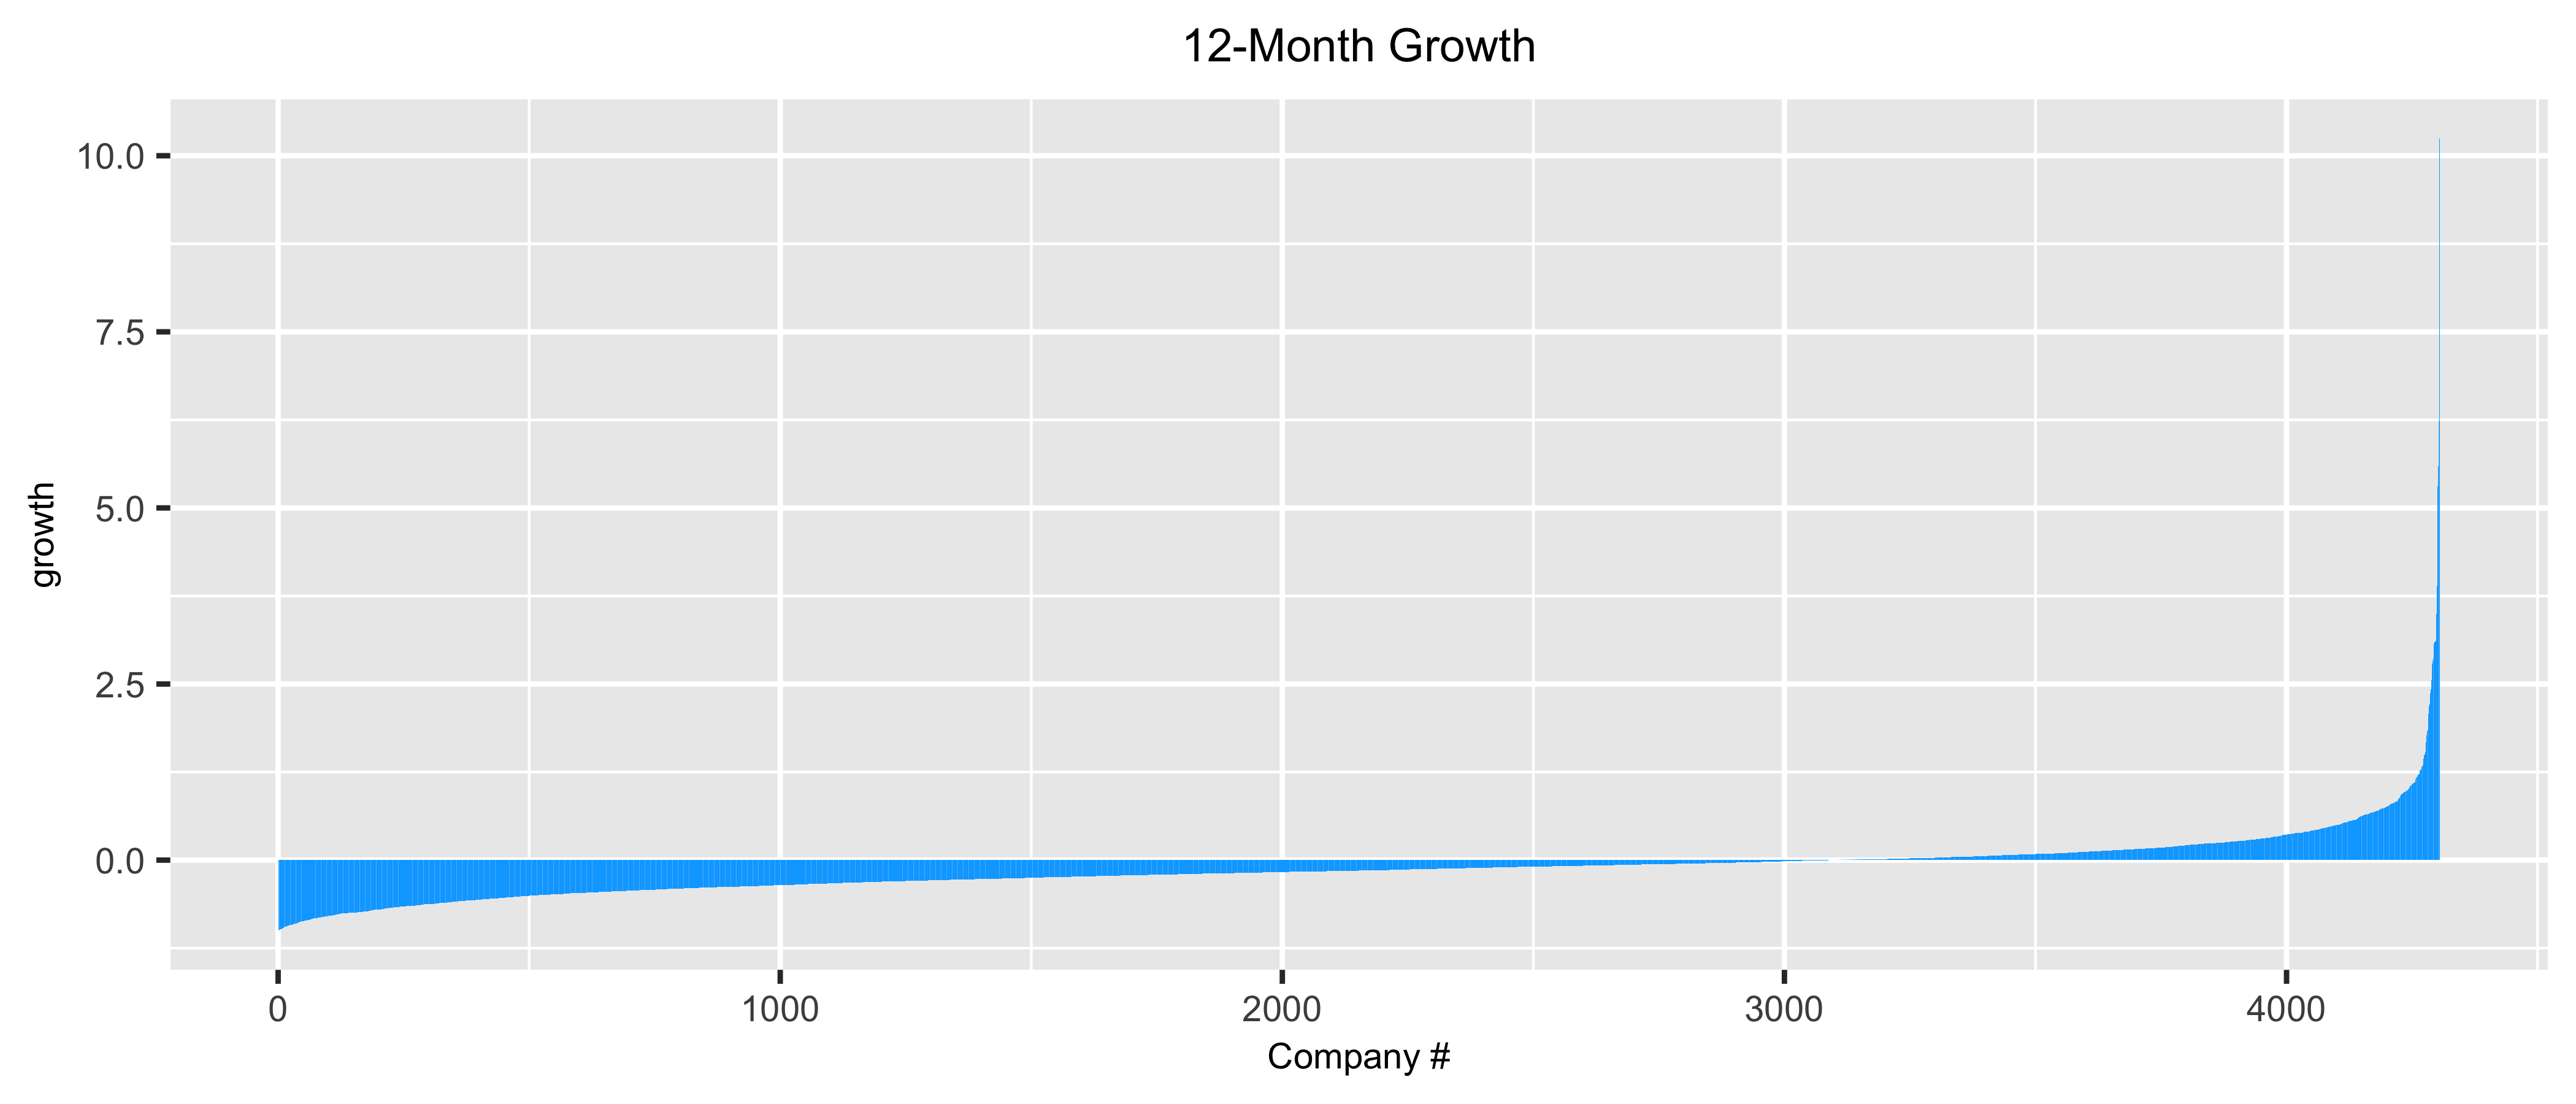

In [20]:
# Present a barchart to visualize growth across companies (sorted lowest to highest).
# You can use sort(data$growth)
# You can use ggplot() + ... + geom_col(aes(x=1:nrow(data), ...))
ggplot(data) + xlab("Company #") + ylab("growth") + ggtitle("12-Month Growth") + 
geom_col(aes(x=1:nrow(data), y=sort(data$growth)))

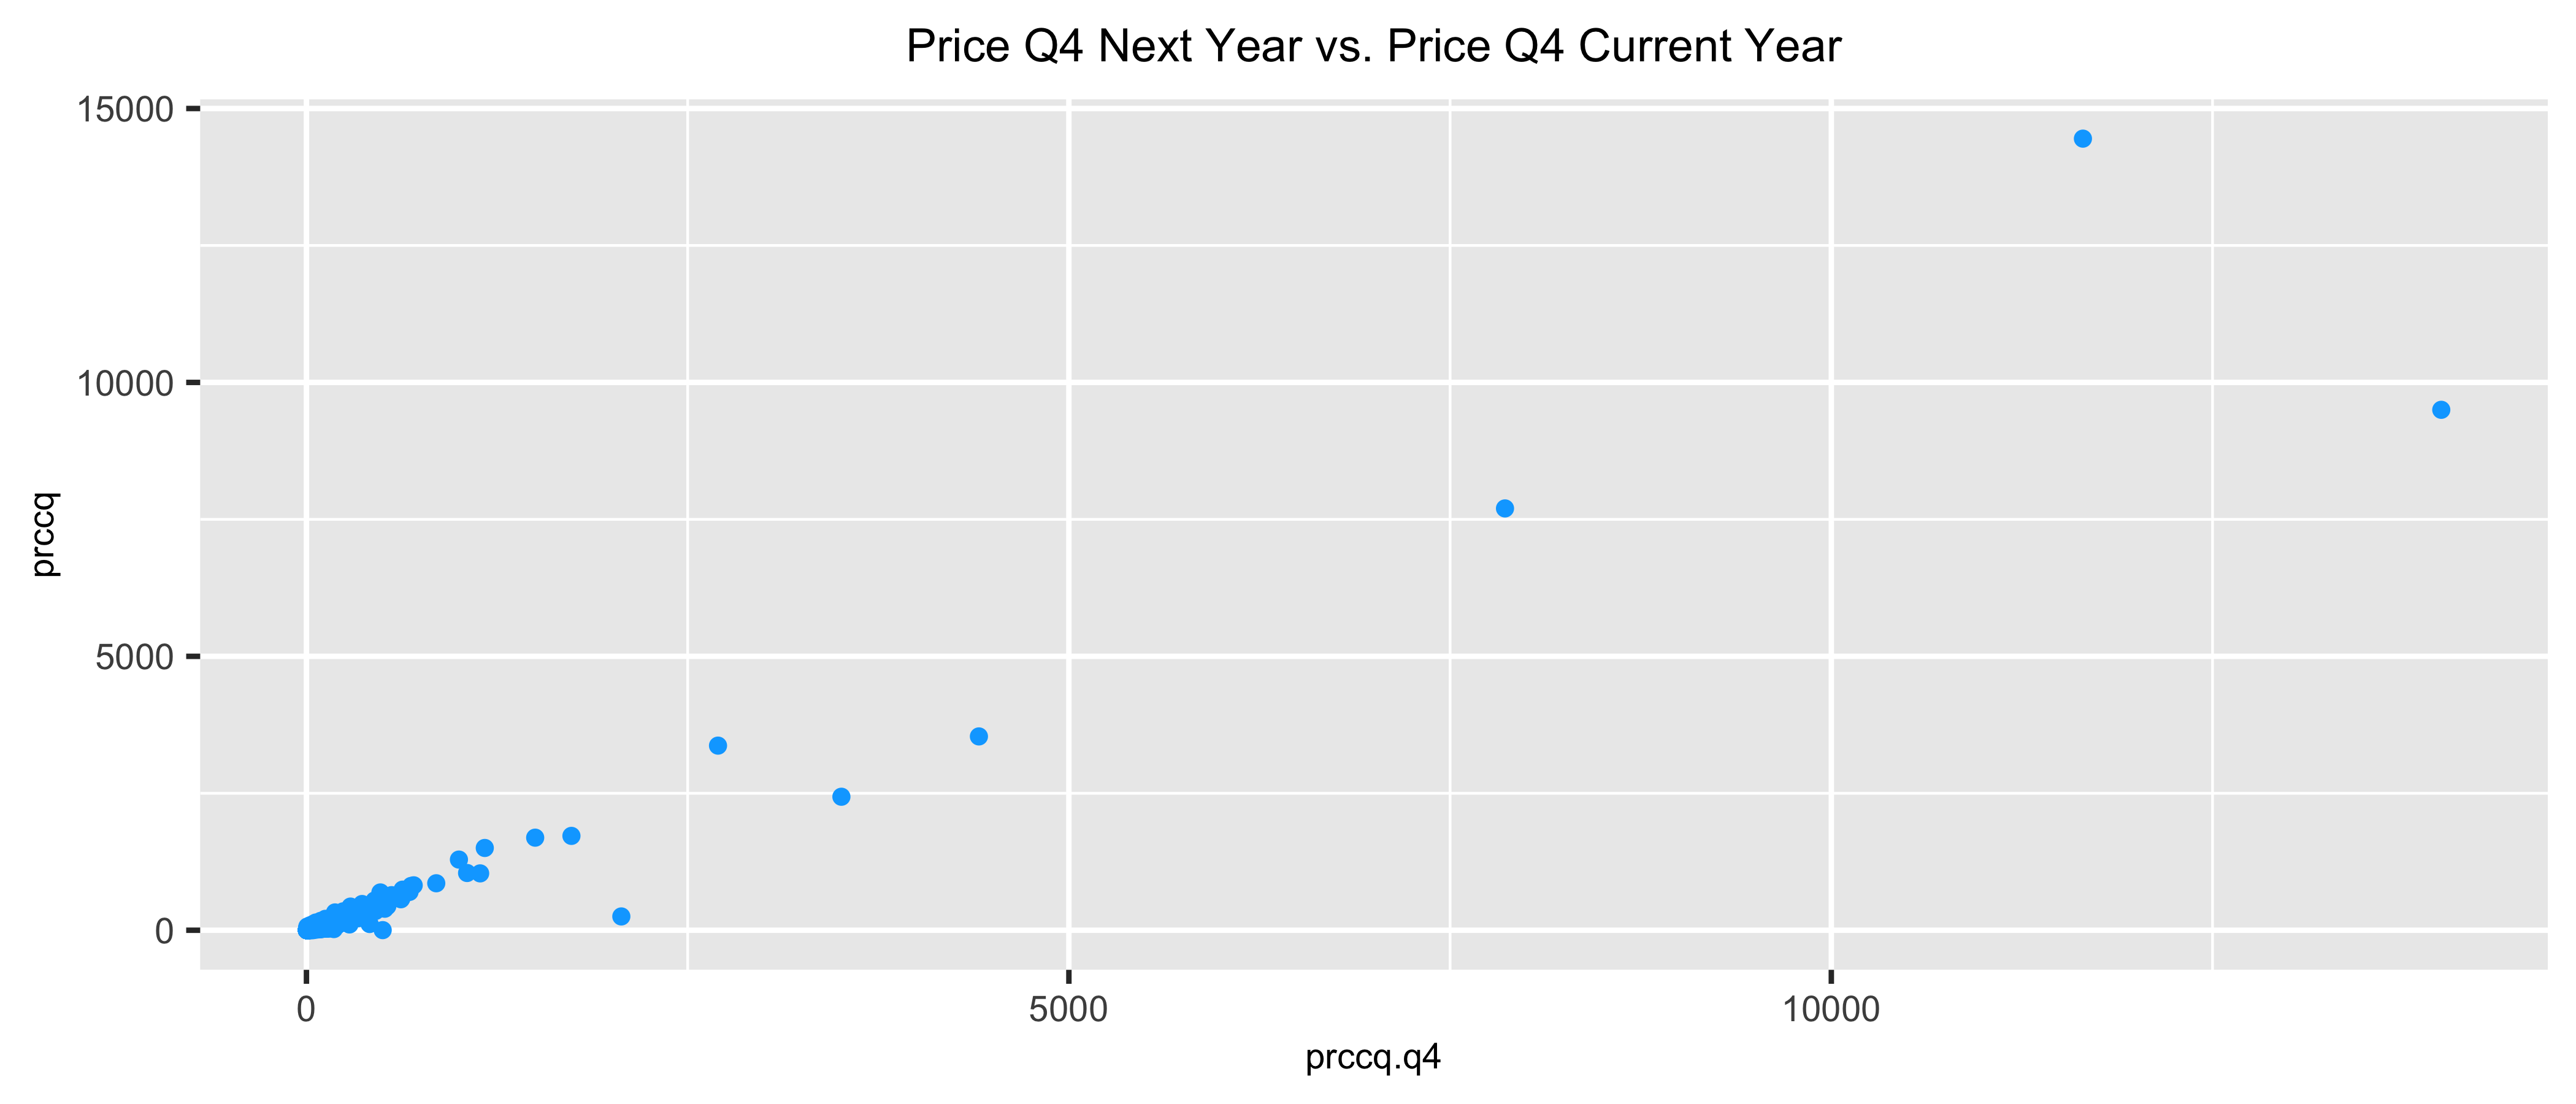

In [21]:
# Present a scatterplot to visualize correlation of price at Q4 next year vs. price at Q4 current year.
ggplot(data) +  ggtitle("Price Q4 Next Year vs. Price Q4 Current Year") + 
geom_point(aes(x=prccq.q4, y=prccq,), color=PALETTE[1]) 


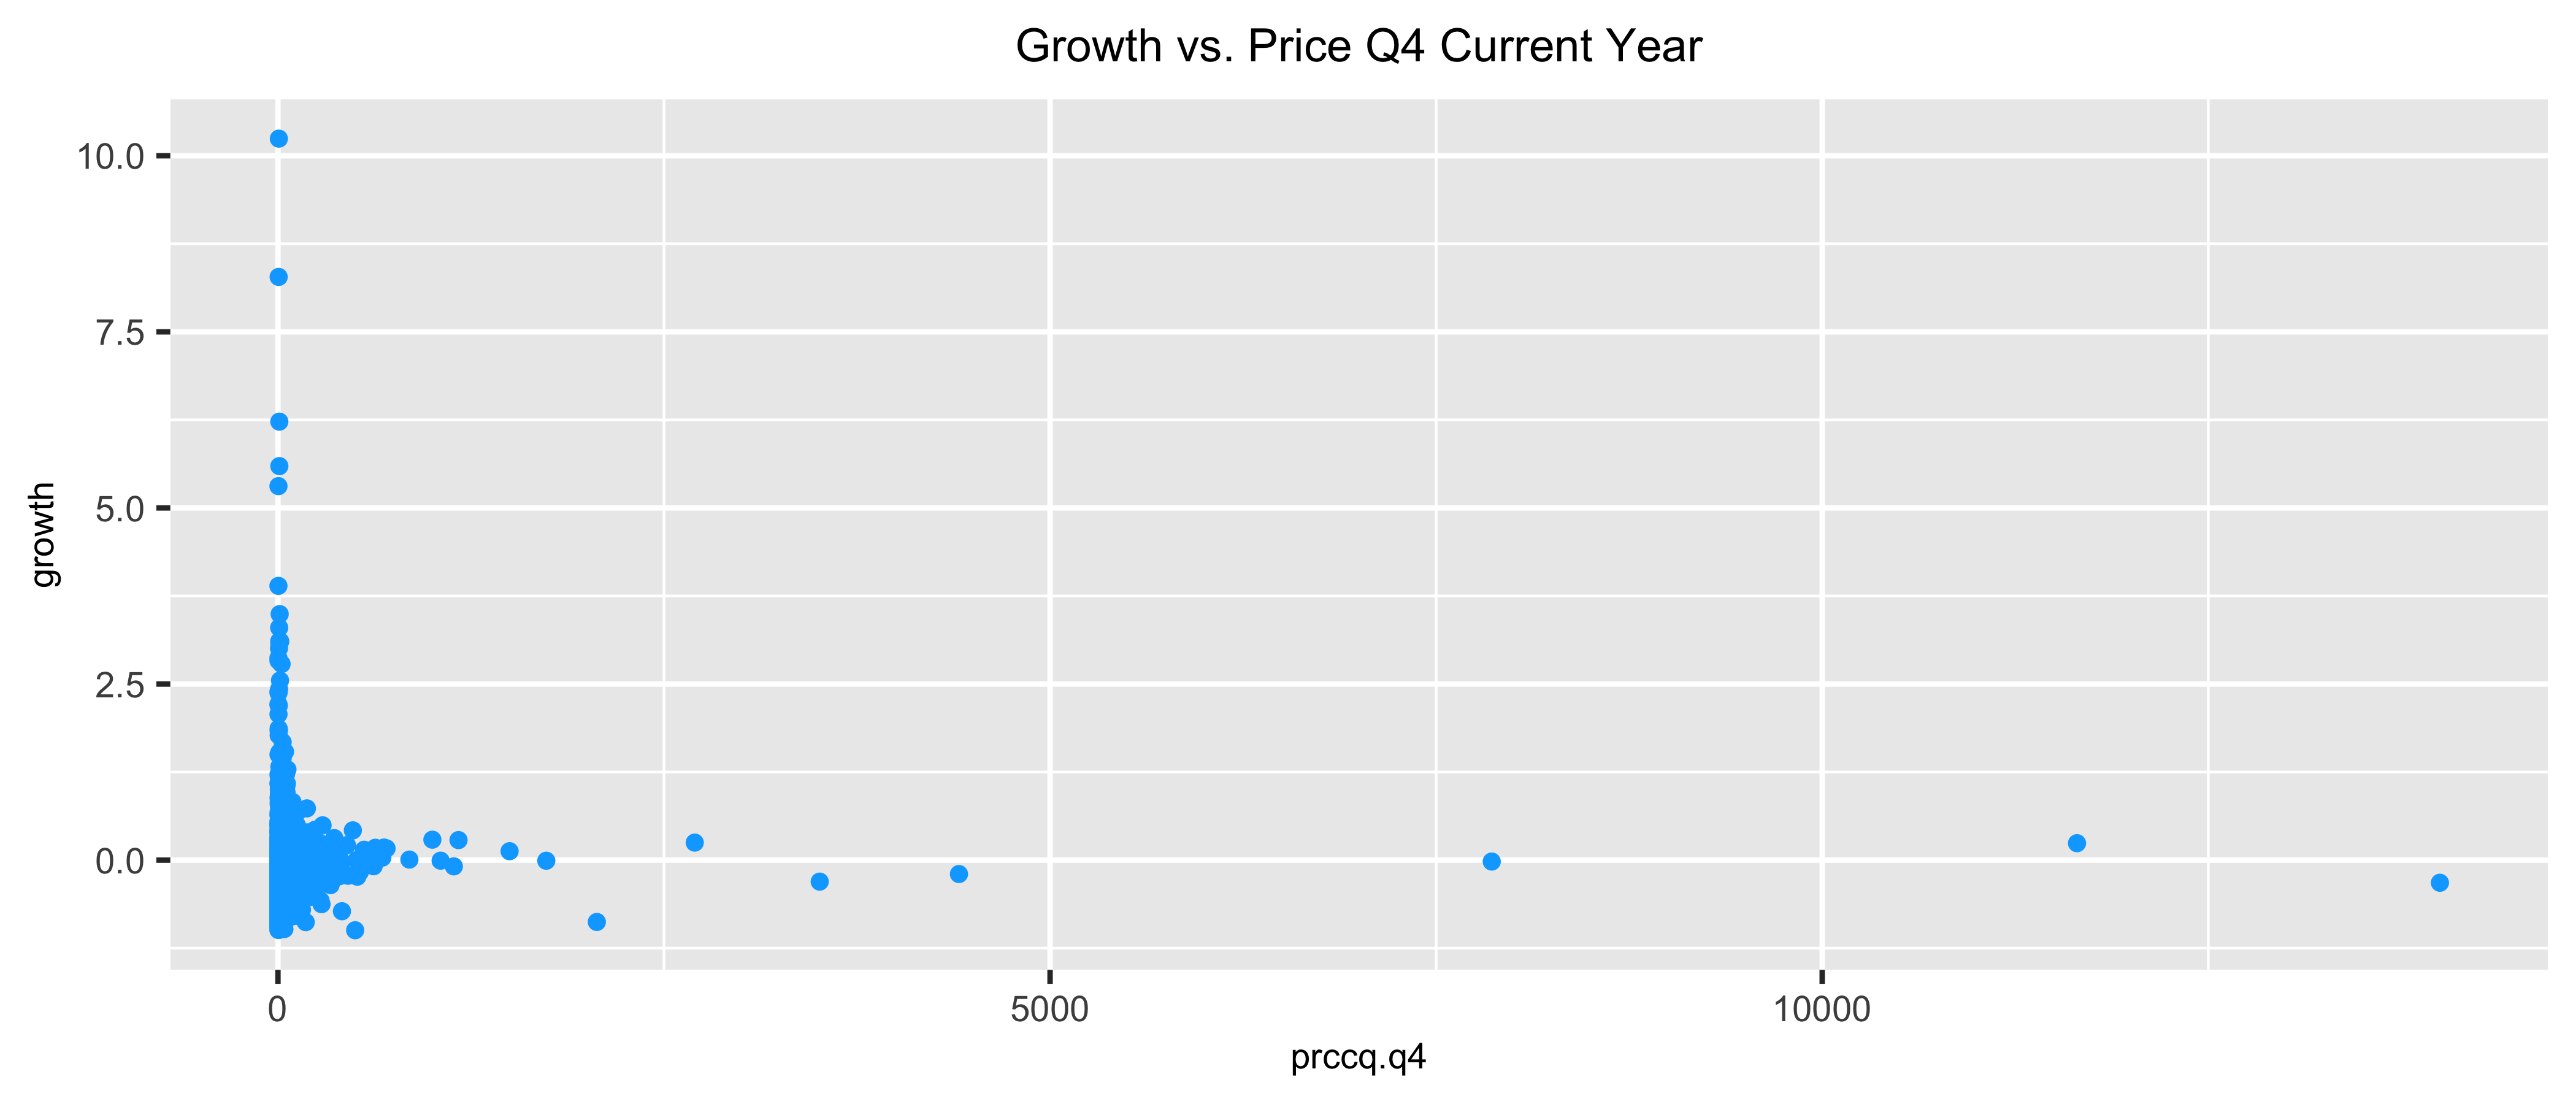

In [22]:
# Present a scatterplot to visualize correlation of growth vs. price at Q4 current year.
ggplot(data) +  ggtitle("Growth vs. Price Q4 Current Year") + 
geom_point(aes(x=prccq.q4, y=growth,), color=PALETTE[1]) 

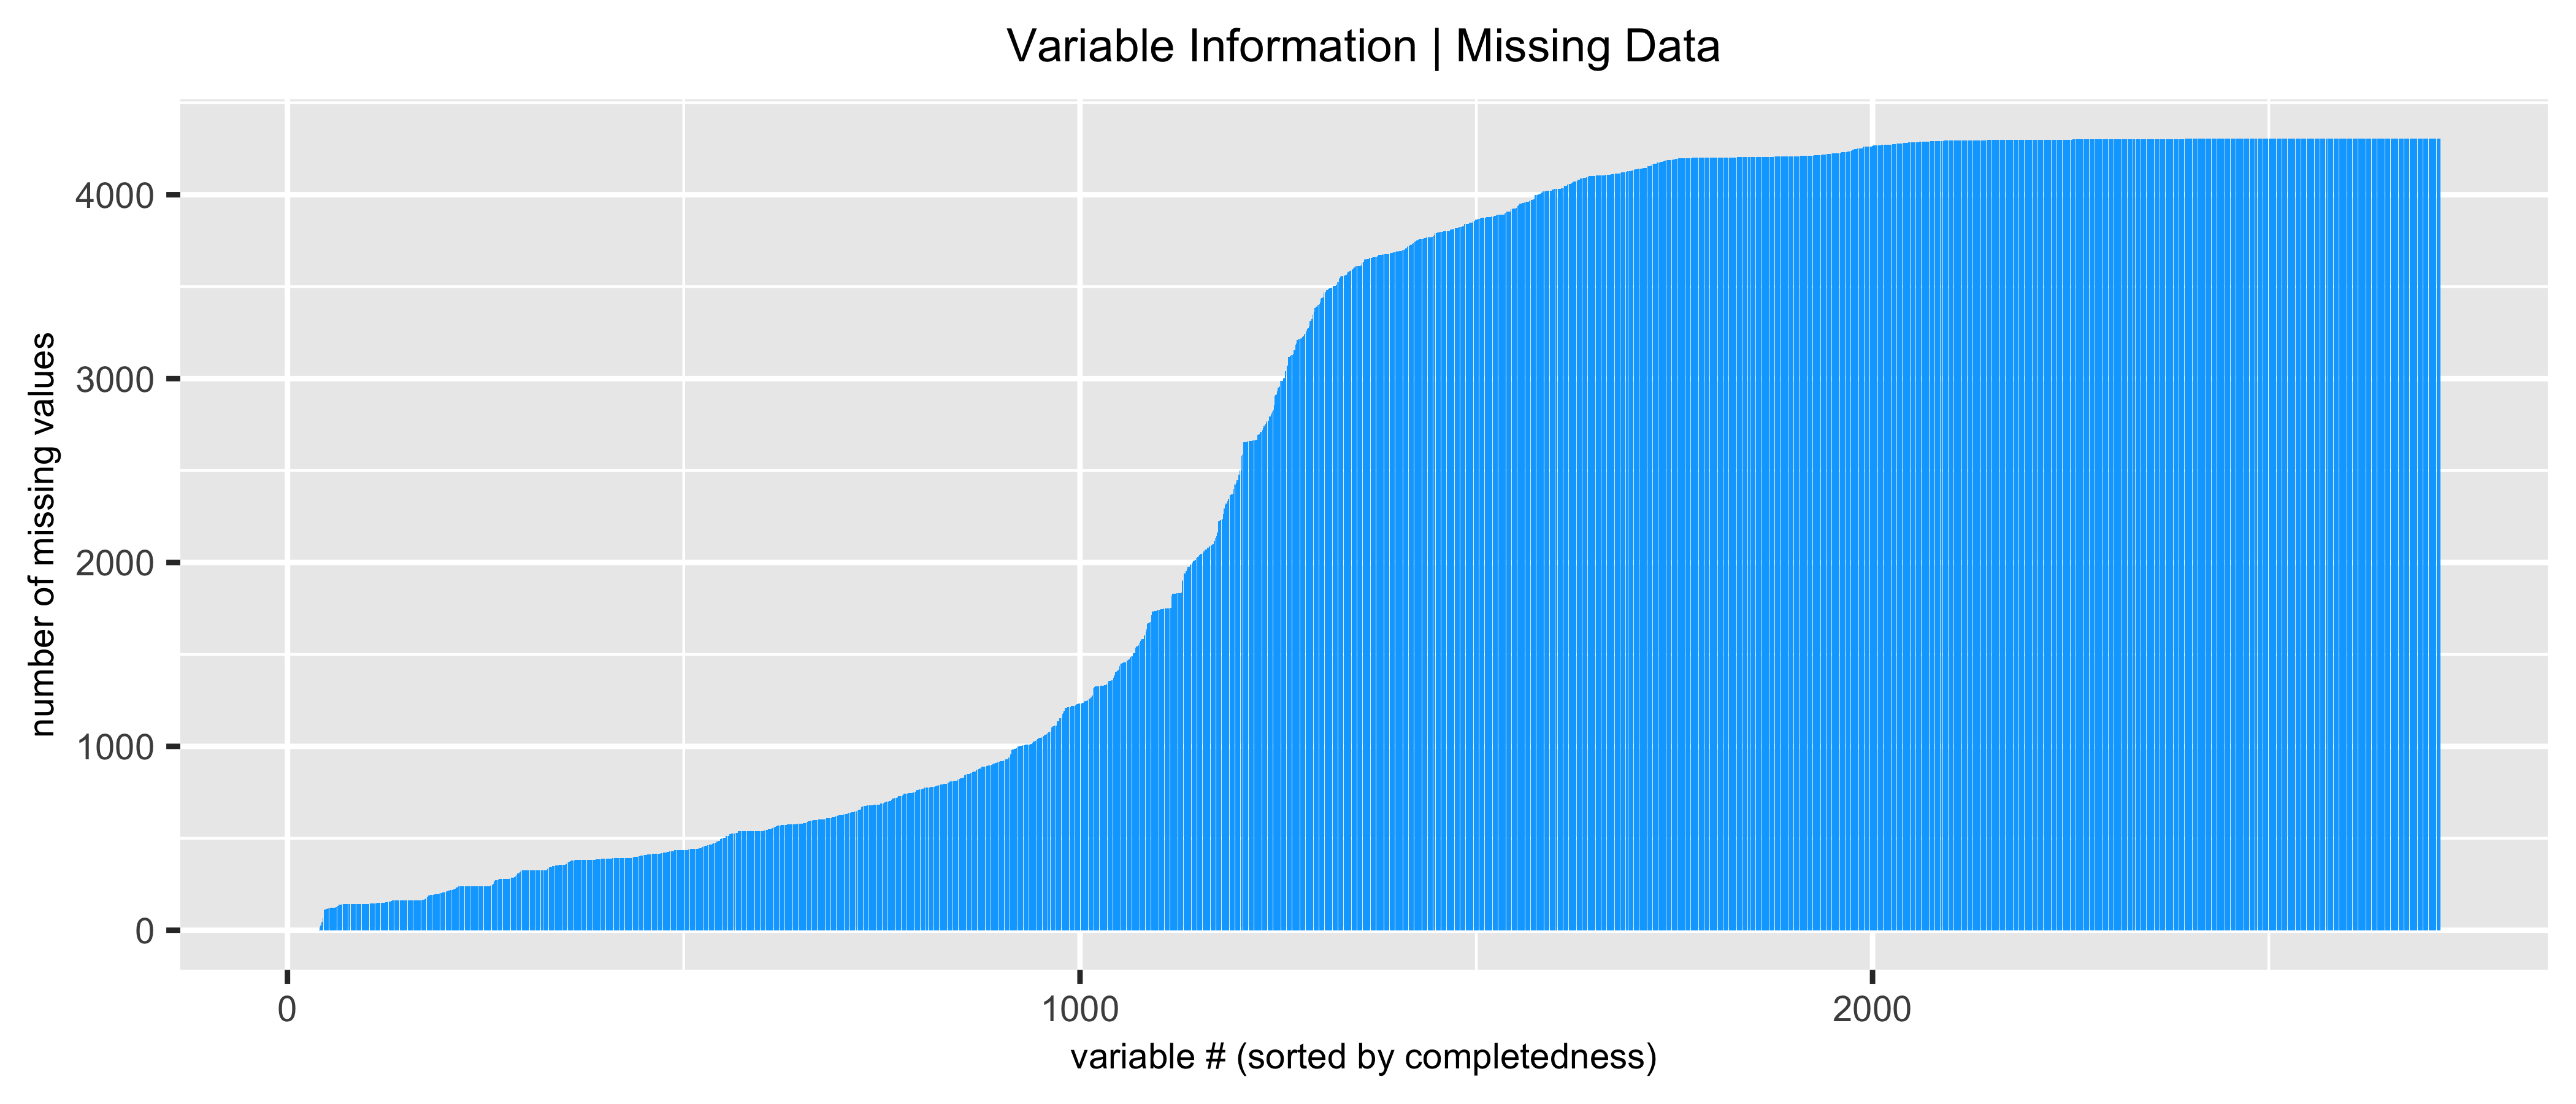

In [23]:
# Present a barchart to visualize the amount of missing data across variables
# (variables on the horizontal axis sorted by most complete to least complete,
#  number of missing values on the vertical axis).
#
# You can use sort(var_info.na_count(data)) 
# You can use ggplot() + ... + geom_col(aes(x=1:ncol(data), ...))

ggplot(data.frame(sort(var_info.na_count(data)))) + xlab("variable # (sorted by completedness)") + 
ylab("number of missing values") + ggtitle("Variable Information | Missing Data") +
geom_col(aes(x=1:ncol(data), y=sort(var_info.na_count(data))))


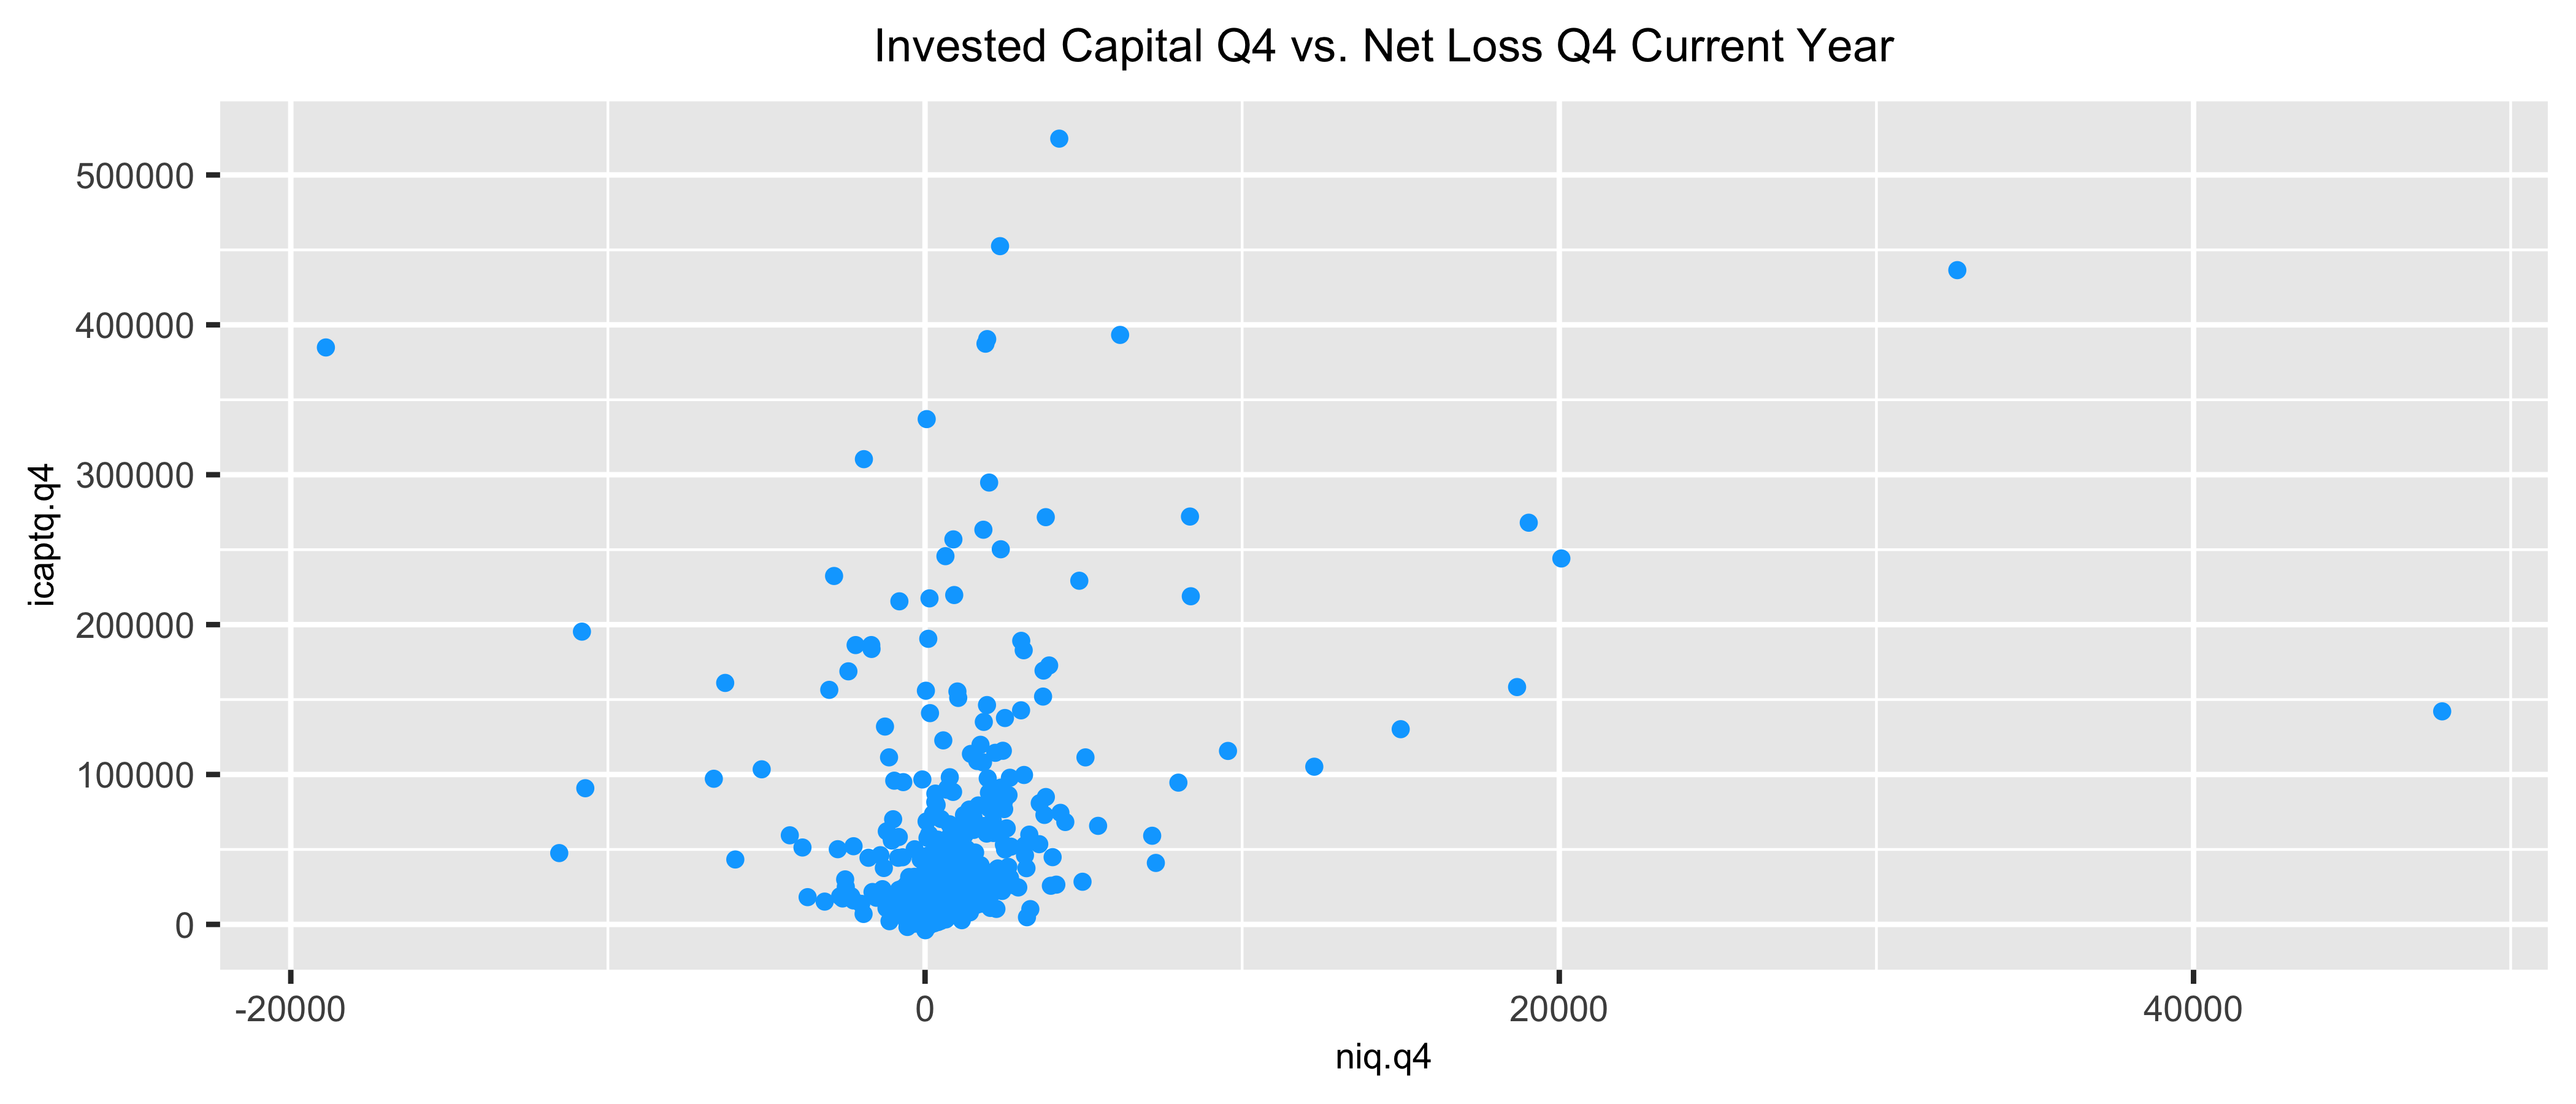

In [84]:
# Present an additional interesting data visualization. 

ggplot(data) +  ggtitle("Invested Capital Q4 vs. Net Loss Q4 Current Year") + 
geom_point(aes(x=niq.q4, y=icaptq.q4,), color=PALETTE[1]) 


In [25]:
# Present an additional interesting data visualization. 


In [26]:
# Present an additional interesting data visualization. 


### Store Data

In [27]:
# Store the data (4305 observations, 2714 variables)
write.csv(data, "My Prepared Data.csv", row.names=FALSE)

<font size=1;>
<p style="text-align: left;">
Copyright (c) Berkeley Data Analytics Group, LLC
<span style="float: right;">
Document revised February 8, 2022
</span>
</p>
</font>